<a href="https://colab.research.google.com/github/Ouardavalue/ERD/blob/master/EDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# code qui permet en cas de changement de chemin du repertoire root, pour eviter de retaper tout le chemin
#fonction utilisée: concatenantion
data_dir = './edp_data/'
mat_file = data_dir + 'matricules.xlsx'
points_file = data_dir + 'PuntosRecarga.xlsx'
provincia_file = data_dir + 'provincia_listado.xls'

In [0]:
mat_cols = ['Categoria_veh_elect', 'Año', 'Mercado', 'Marca', 'Modelo', 'Provincia', 'Canal']
prov_cols = ['Autonomia', 'Superficie', 'PROVINCIA']

df_matricules = pd.read_excel(mat_file,
                              usecols=mat_cols)

df_points = pd.read_excel(points_file)
df_provincia = pd.read_excel(provincia_file,
                             usecols=prov_cols)

In [0]:
df_matricules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Categoria_veh_elect  130 non-null    object
 1   Año                  130 non-null    int64 
 2   Mercado              130 non-null    object
 3   Marca                130 non-null    object
 4   Modelo               130 non-null    object
 5   Provincia            130 non-null    object
 6   Canal                130 non-null    object
 7   EneroLY              130 non-null    int64 
 8   FebreroLY            130 non-null    int64 
 9   MarzoLY              130 non-null    int64 
 10  AbrilLY              130 non-null    int64 
 11  MayoLY               130 non-null    int64 
 12  JunioLY              130 non-null    int64 
 13  JulioLY              130 non-null    int64 
 14  AgostoLY             130 non-null    int64 
 15  SeptiembreLY         130 non-null    int64 
 16  OctubreL

In [0]:
df_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   52 non-null     object 
 1   Superficie  52 non-null     float64
 2   Autonomia   52 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [0]:
df_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grupo               153 non-null    object 
 1   organizacion        153 non-null    object 
 2   SuperCPO            156 non-null    object 
 3   GrupoCargadoresCPO  156 non-null    object 
 4   region              156 non-null    object 
 5   zona                156 non-null    object 
 6   ubicacion           156 non-null    object 
 7   latitud             156 non-null    float64
 8   longitud            156 non-null    float64
 9   posteRecarga        156 non-null    object 
 10  toma                154 non-null    object 
dtypes: float64(2), object(9)
memory usage: 13.5+ KB


In [0]:
df_matricules['Modelo'].unique()

array(['E-GOLF 3P/5P', 'E-UP! 3P', 'NEO 5P', 'GOLF 1.4 GTE',
       'PASSAT 1.4 GTE 4P (B6)', 'PASSAT VARIANT 1.4 GTE (B6)'],
      dtype=object)

In [0]:
#Normalisation des regions du fichier points
df_points['region'] = df_points['region'].str.lower()
df_points['region'] = df_points['region'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_points['region'].unique()

array(['principado de asturias', 'pais vasco', 'comunidad valenciana',
       'cantabria', 'castilla y leon', 'region de murcia', 'andalucia'],
      dtype=object)

In [0]:
#Normalisation des noms de provinces du fichier provincia_listado
df_provincia['PROVINCIA'] = df_provincia['PROVINCIA'].str.lower()
df_provincia['PROVINCIA'] = df_provincia['PROVINCIA'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

df_provincia['Autonomia'] = df_provincia['Autonomia'].str.lower()
df_provincia['Autonomia'] = df_provincia['Autonomia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

def match_region_name(reg_src, list_reg):
  l_src = reg_src.split()

  if len(l_src) == 1:
    return reg_src

  l = list(map(str.split, list_reg))
  l = [i for i in l if len(i) > 1]
  return ' '.join(next((s for s in l if set(l_src) == set(s)), reg_src.split()))

df_provincia['Autonomia'] = df_provincia['Autonomia'].str.replace('\(|\)', '', regex=True)
df_provincia['Autonomia'] = df_provincia['Autonomia'].apply(lambda x : match_region_name(x, df_points['region'].unique()))
df_provincia['Autonomia'].unique()

array(['pais vasco', 'castilla-la mancha', 'comunidad valenciana',
       'andalucia', 'castilla y leon', 'extremadura', 'balears illes',
       'cataluna', 'galicia', 'aragon', 'rioja la', 'madrid comunidad de',
       'region de murcia', 'navarra comunidad foral de',
       'principado de asturias', 'canarias', 'cantabria',
       'ceuta ciudad de', 'melilla ciudad de'], dtype=object)

In [0]:
#Normalisation des noms des provinces du fichier matricules
def replace_whole_str(sub, l):
  return next((s for s in l if sub in s), sub)

df_matricules['Provincia'] = df_matricules['Provincia'].apply(lambda x : x.strip().lower())
df_matricules['Provincia'] = df_matricules['Provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_matricules['Provincia'] = df_matricules['Provincia'].apply(lambda x : replace_whole_str(x, df_provincia['PROVINCIA'].unique()))
df_matricules['Provincia'].unique()

array(['araba/alava', 'sta. cruz tenerife', 'murcia', 'valladolid',
       'huelva', 'alicante/alacant', 'castellon/castello', 'ciudad real',
       'coruna (la)', 'gerona', 'guadalajara', 'huesca', 'madrid',
       'navarra', 'palmas (las)', 'pontevedra', 'tarragona', 'zaragoza',
       'albacete', 'almeria', 'badajoz', 'burgos', 'cantabria', 'cordoba',
       'guipuzcoa', 'sevilla', 'barcelona', 'asturias', 'baleares',
       'leon', 'salamanca', 'toledo', 'valencia/valencia', 'rioja (la)',
       'malaga', 'vizcaya', 'granada', 'cadiz', 'lugo', 'jaen', 'lerida',
       'orense'], dtype=object)

In [0]:
df_provincia['PROVINCIA'].unique()

array(['araba/alava', 'albacete', 'alicante/alacant', 'almeria', 'avila',
       'badajoz', 'balears (illes)', 'barcelona', 'burgos', 'caceres',
       'cadiz', 'castellon/castello', 'ciudad real', 'cordoba',
       'coruna (a)', 'cuenca', 'girona', 'granada', 'guadalajara',
       'gipuzkoa', 'huelva', 'huesca', 'jaen', 'leon', 'lleida',
       'rioja (la)', 'lugo', 'madrid', 'malaga', 'murcia', 'navarra',
       'ourense', 'asturias', 'palencia', 'palmas (las)', 'pontevedra',
       'salamanca', 'santa cruz de tenerife', 'cantabria', 'segovia',
       'sevilla', 'soria', 'tarragona', 'teruel', 'toledo',
       'valencia/valencia', 'valladolid', 'bizkaia', 'zamora', 'zaragoza',
       'ceuta', 'melilla'], dtype=object)

In [0]:
#Jointure matricules et provinces
df_merged_w_provincia= df_matricules.merge(df_provincia,
                                left_on='Provincia',
                                right_on='PROVINCIA')

In [0]:
df_merged_w_provincia.head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia
0,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco
1,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Empresa,araba/alava,3042.44,pais vasco
2,PHEV,2019,Automoviles,VOLKSWAGEN,GOLF 1.4 GTE,araba/alava,Empresa,araba/alava,3042.44,pais vasco
3,BEV,2018,Automoviles,VOLKSWAGEN,E-UP! 3P,murcia,Particular,murcia,11313.88,region de murcia
4,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,murcia,Empresa,murcia,11313.88,region de murcia


In [0]:
#Jointure avec les bornes EDP
df_merged_w_points = df_merged_w_provincia.merge(df_points,
                                                 how='left',
                                                 left_on='Autonomia',
                                                 right_on='region')

In [0]:
#Df n'ayant pas de bornes dans la même regions que les voitures
df_merged_w_points[df_merged_w_points['zona'].isnull()].head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia,grupo,organizacion,SuperCPO,GrupoCargadoresCPO,region,zona,ubicacion,latitud,longitud,posteRecarga,toma
87,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,ciudad real,Empresa,ciudad real,19662.78,castilla-la mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,guadalajara,Particular,guadalajara,12208.62,castilla-la mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,PHEV,2018,Automoviles,VOLKSWAGEN,PASSAT VARIANT 1.4 GTE (B6),guadalajara,Particular,guadalajara,12208.62,castilla-la mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,PHEV,2018,Automoviles,VOLKSWAGEN,PASSAT 1.4 GTE 4P (B6),guadalajara,Empresa,guadalajara,12208.62,castilla-la mancha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,BEV,2019,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,huesca,Empresa,huesca,15636.50,aragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Df bornes présentes dans la même région que les voitures
df_merged_w_points[df_merged_w_points['zona'].notnull()].head()

,Categoria_veh_elect,Año,Mercado,Marca,Modelo,Provincia,Canal,PROVINCIA,Superficie,Autonomia,grupo,organizacion,SuperCPO,GrupoCargadoresCPO,region,zona,ubicacion,latitud,longitud,posteRecarga,toma
0,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,CCS Combo 2 Plug (Cable Attached)
1,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,CHAdeMO
2,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,Edp Moveon,EDP,EDP moveon,EDP Moveon,pais vasco,Vitoria,País Vasco,42.860120,-2.703290,Vitorialanda,Type 2 Connector (Cable Attached)
3,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,EDP Mantenimiento,Mantenimiento,EDP moveon,EDP Moveon,pais vasco,Bergara,País Vasco,43.107969,-2.406641,Avia - Bergara,CHAdeMO
4,BEV,2018,Automoviles,VOLKSWAGEN,E-GOLF 3P/5P,araba/alava,Particular,araba/alava,3042.44,pais vasco,ISASTUR,Mantenimiento,EDP moveon,EDP Moveon,pais vasco,Murguía,País Vasco,42.961774,-2.827486,Murguía,CHAdeMO


# Premier jet

In [0]:
#Nombre de bornes par region
df_point_per_region = df_points['region'].value_counts().rename_axis('region').reset_index(name='count_point')
df_point_per_region

,region,count_point
0,principado de asturias,124
1,comunidad valenciana,10
2,pais vasco,7
3,cantabria,5
4,andalucia,4
5,castilla y leon,4
6,region de murcia,2


In [0]:
#Nb matricule par region
df_veh_per_region = df_merged_w_provincia.groupby('Autonomia').agg({'Categoria_veh_elect': 'count'}).reset_index()
df_veh_per_region

,Autonomia,Categoria_veh_elect
0,andalucia,21
1,aragon,5
2,canarias,6
3,cantabria,1
4,castilla y leon,7
5,castilla-la mancha,6
6,cataluna,13
7,comunidad valenciana,10
8,extremadura,1
9,galicia,4


In [0]:
#Par region, nombre de bornes et voiture (Left Join)
df_merged = df_provincia.merge(df_point_per_region, how='left', left_on='Autonomia', right_on='region')\
                        .merge(df_veh_per_region, how='left', on='Autonomia')
df_merged = df_merged[['Autonomia', 'count_point', 'Categoria_veh_elect']].drop_duplicates().fillna(0)
df_merged

,Autonomia,count_point,Categoria_veh_elect
0,pais vasco,7.0,3.0
1,castilla-la mancha,0.0,6.0
2,comunidad valenciana,10.0,10.0
3,andalucia,4.0,21.0
4,castilla y leon,4.0,7.0
5,extremadura,0.0,1.0
6,balears illes,0.0,0.0
7,cataluna,0.0,13.0
14,galicia,0.0,4.0
21,aragon,0.0,5.0


In [0]:
#One-Hot Encoding
df_merged_dummy = pd.concat([pd.get_dummies(df_merged['Autonomia']), df_merged[['count_point', 'Categoria_veh_elect']]], axis=1)
df_merged_dummy

,andalucia,aragon,balears illes,canarias,cantabria,castilla y leon,castilla-la mancha,cataluna,ceuta ciudad de,comunidad valenciana,extremadura,galicia,madrid comunidad de,melilla ciudad de,navarra comunidad foral de,pais vasco,principado de asturias,region de murcia,rioja la,count_point,Categoria_veh_elect
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.0,3.0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10.0,10.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,21.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,7.0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,13.0
14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,4.0
21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5.0


In [0]:
#Entrainement d'un modele KMeans
from sklearn.cluster import KMeans

n_clusters = 3
X = df_merged_dummy.values

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Check des corrdonées des centroides
kmeans.cluster_centers_

array([[6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 7.14285714e-02,
        7.14285714e-02, 7.14285714e-02, 7.14285714e-02, 6.93889390e-18,
        7.14285714e-02, 6.93889390e-18, 7.14285714e-02, 7.14285714e-02,
        6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 7.14285714e-02,
        6.93889390e-18, 7.14285714e-02, 7.14285714e-02, 1.28571429e+00,
        3.14285714e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24000000e+02,
        5.00000000e+00],
       [2.50000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
        0.00000000e+00, 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
        2.5000

In [0]:
#Dimensionality reduction
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
X_reduced = pca.fit(X)

In [0]:
from matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], [])

In [0]:
df_points['region'].unique()

array(['principado de asturias', 'pais vasco', 'comunidad valenciana',
       'cantabria', 'castilla y leon', 'region de murcia', 'andalucia'],
      dtype=object)

NameError: ignored

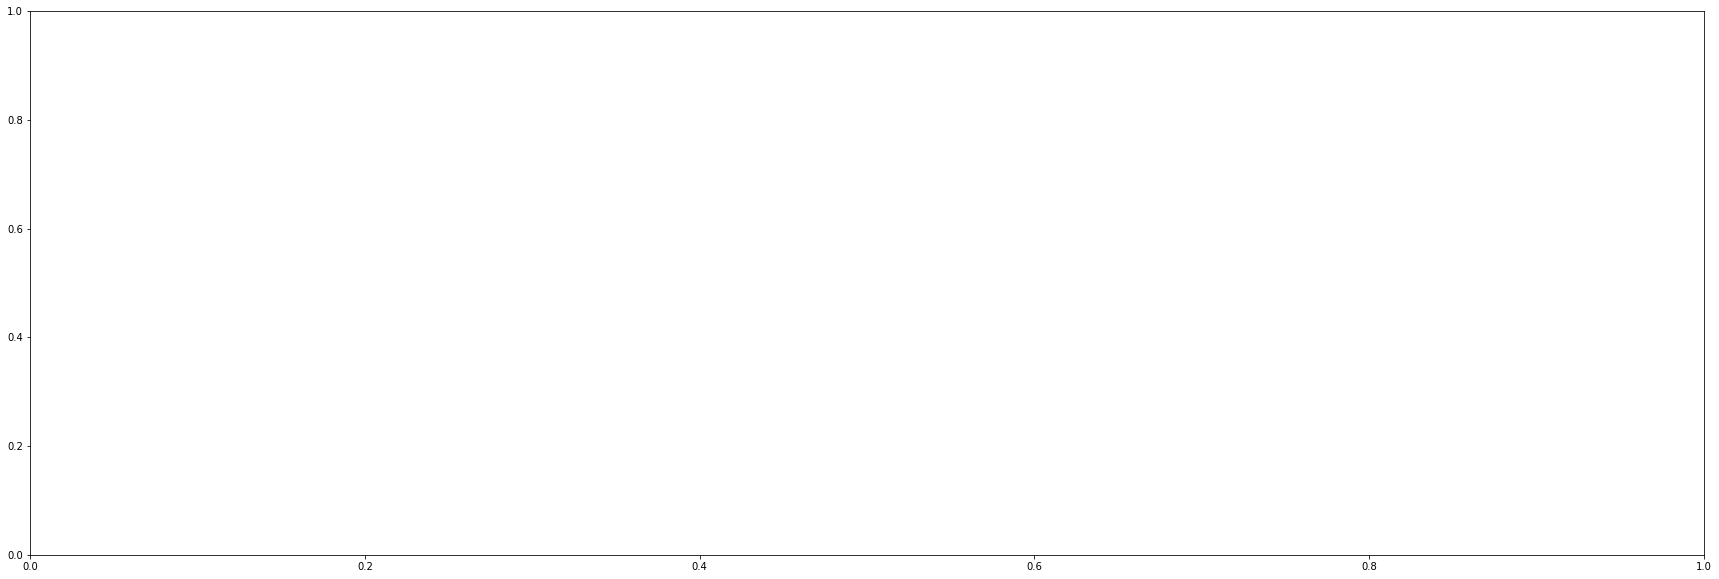

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize= (30, 10)) 
sns.barplot(x='Provincia', y='Modelo', data=df_grouped_by_provincia)

In [0]:
df_points['region']

0      Principado de Asturias
1      Principado de Asturias
2      Principado de Asturias
3      Principado de Asturias
4      Principado de Asturias
                ...          
151                 Andalucía
152                 Andalucía
153                 Andalucía
154                 Andalucía
155                 Cantabria
Name: region, Length: 156, dtype: object

In [0]:
df_matricules['Provincia'] = df_matricules['Provincia'].apply(lambda x : x.rstrip())